C:\Users\Suchi\AppData\Local\Temp\ipykernel_9548\3618002934.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range(start='2025-01-01', periods=168, freq='H')


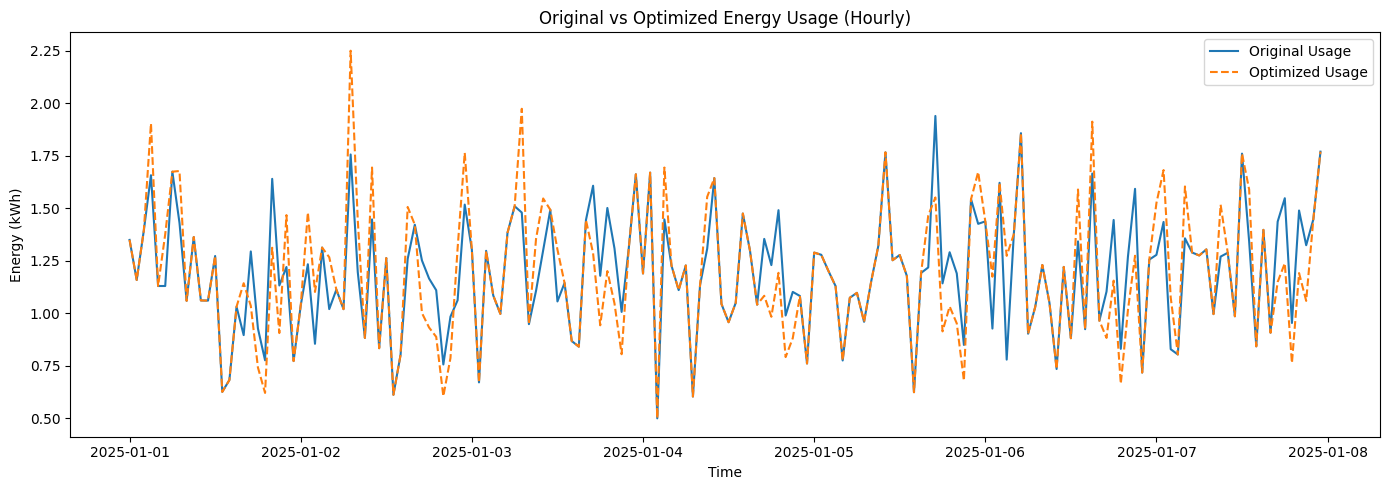

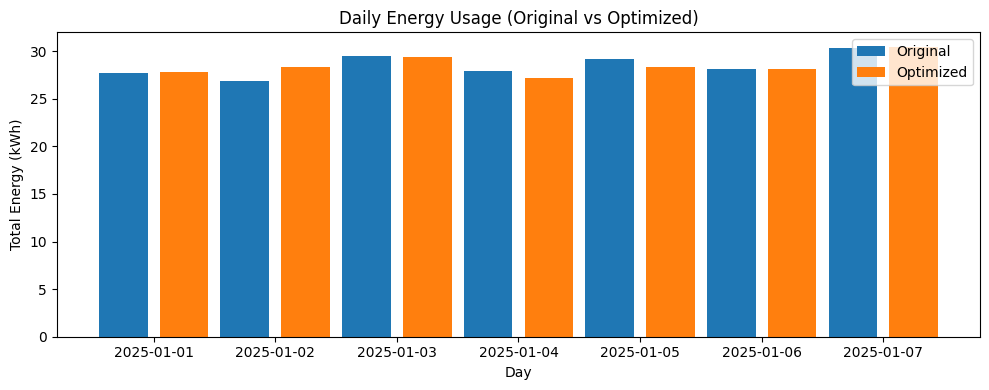

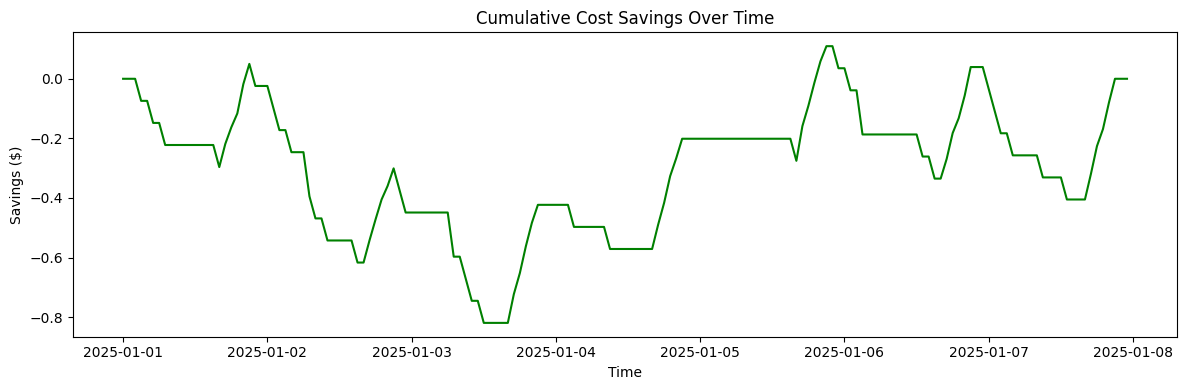

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate energy usage data: 7 days of hourly usage (in kWh)
np.random.seed(42)
hours = pd.date_range(start='2025-01-01', periods=168, freq='H')
usage = np.random.normal(loc=1.2, scale=0.3, size=168)  # average 1.2 kWh per hour
usage = np.clip(usage, 0.5, 2.0)

df = pd.DataFrame({'Timestamp': hours, 'Usage_kWh': usage})
df.set_index('Timestamp', inplace=True)

# Define peak hours (e.g., 5 PM - 10 PM)
peak_hours = df.index.hour.isin([17, 18, 19, 20, 21])

# Optimization: Reduce peak usage by 20% and shift to off-peak hours (randomly selected)
df['Optimized_kWh'] = df['Usage_kWh']
df.loc[peak_hours, 'Optimized_kWh'] *= 0.8
shifted_energy = (df['Usage_kWh'][peak_hours] * 0.2).sum()

# Distribute shifted energy to off-peak hours
off_peak_indices = df[~peak_hours].sample(n=len(df[peak_hours]), replace=True).index
for i in off_peak_indices:
    df.at[i, 'Optimized_kWh'] += shifted_energy / len(off_peak_indices)
# Calculate savings (assuming higher cost during peak hours)
df['Cost_Original'] = df['Usage_kWh'] * (0.30 if peak_hours.any() else 0.15)
df['Cost_Optimized'] = df['Optimized_kWh'] * (0.30 if peak_hours.any() else 0.15)
df['Savings'] = df['Cost_Original'] - df['Cost_Optimized']

# Plot 1: Hourly Usage Comparison
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Usage_kWh'], label='Original Usage')
plt.plot(df.index, df['Optimized_kWh'], label='Optimized Usage', linestyle='--')
plt.title('Original vs Optimized Energy Usage (Hourly)')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Daily Total Energy Usage
daily_usage = df.resample('D').sum()
plt.figure(figsize=(10, 4))
plt.bar(daily_usage.index - pd.Timedelta(hours=6), daily_usage['Usage_kWh'], width=0.4, label='Original')
plt.bar(daily_usage.index + pd.Timedelta(hours=6), daily_usage['Optimized_kWh'], width=0.4, label='Optimized')
plt.title('Daily Energy Usage (Original vs Optimized)')
plt.xlabel('Day')
plt.ylabel('Total Energy (kWh)')
plt.legend()
plt.tight_layout()
plt.show()
# Plot 3: Cumulative Savings Over Time
df['Cumulative_Savings'] = df['Savings'].cumsum()
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['Cumulative_Savings'], color='green')
plt.title('Cumulative Cost Savings Over Time')
plt.xlabel('Time')
plt.ylabel('Savings ($)')
plt.tight_layout()
plt.show()